# Data Exploration

In [20]:
import json
import project_utilities as utils
from project_utilities import pd, np

import seaborn as sns
import matplotlib.pyplot as plt

file_name_data = 'proj1_data.json'

with open(file_name_data) as fp:
    data = json.load(fp)

## Pre-processing Data

In [21]:
X = utils.process_data(data)

[{'text': ['its', 'raining', 'sideways'],
  'is_root': 0,
  'controversiality': 0,
  'children': 0,
  'popularity_score': 1.254698160267241},
 {'text': ['wheel', 'of', 'time', 'reader', 'confirmed!'],
  'is_root': 0,
  'controversiality': 0,
  'children': 0,
  'popularity_score': 0.5098127108953306},
 {'text': ['the', 'jungle', 'book', 'of', 'pussy'],
  'is_root': 0,
  'controversiality': 0,
  'children': 0,
  'popularity_score': 0.37082680372624166},
 {'text': ["i'm",
   'just',
   'making',
   'this',
   'thread',
   'since',
   'there',
   'is',
   'an',
   'opposite',
   'in',
   'the',
   'top',
   '10!'],
  'is_root': 0,
  'controversiality': 0,
  'children': 0,
  'popularity_score': -0.272842545494951},
 {'text': ['hi',
   'there,',
   'looks',
   'like',
   "you're",
   'wanting',
   'to',
   'discuss',
   'something',
   'related',
   'to',
   'new',
   "year's,",
   'thankfully,',
   'we',
   'have',
   'a',
   'dedicated',
   'thread',
   'for',
   'that!',
   '[go',
   'her

## Split Data into Training, Validation, and Test Sets

In [17]:
X_train = X[0:10000]
X_validation = X[10000:11000]
X_test = X[11000:]

assert len(X_train) == 10000 , 'Expected 10000. Got %d' % len(X_train)
assert len(X_validation) == 1000 , 'Expected 1000. Got %d' % len(X_validation)
assert len(X_test) == 1000 , 'Expected 1000. Got %d' % len(X_test)

## Word Count Features

In [18]:
top_words_train = utils.get_top_words(X_train)
top_words_validation = utils.get_top_words(X_validation)

assert len(top_words_train) == 160, 'Expected 160. Got %d' % len(top_words_train)
assert len(top_words_validation) == 160, 'Expected 160. Got %d' % len(top_words_validation)

X_train = utils.insert_top_words_count(X_train, top_words_train)
X_validation = utils.insert_top_words_count(X_validation, top_words_validation)

In [19]:
X_train

[{'text': ['its', 'raining', 'sideways'],
  'is_root': 0,
  'controversiality': 0,
  'children': 0,
  'popularity_score': 1.254698160267241,
  'top_word_001': 0,
  'top_word_002': 0,
  'top_word_003': 0,
  'top_word_004': 0,
  'top_word_005': 0,
  'top_word_006': 0,
  'top_word_007': 0,
  'top_word_008': 0,
  'top_word_009': 0,
  'top_word_010': 0,
  'top_word_011': 0,
  'top_word_012': 0,
  'top_word_013': 0,
  'top_word_014': 0,
  'top_word_015': 0,
  'top_word_016': 0,
  'top_word_017': 0,
  'top_word_018': 0,
  'top_word_019': 0,
  'top_word_020': 0,
  'top_word_021': 0,
  'top_word_022': 0,
  'top_word_023': 0,
  'top_word_024': 0,
  'top_word_025': 0,
  'top_word_026': 0,
  'top_word_027': 0,
  'top_word_028': 0,
  'top_word_029': 0,
  'top_word_030': 0,
  'top_word_031': 0,
  'top_word_032': 0,
  'top_word_033': 0,
  'top_word_034': 0,
  'top_word_035': 0,
  'top_word_036': 0,
  'top_word_037': 0,
  'top_word_038': 0,
  'top_word_039': 0,
  'top_word_040': 0,
  'top_word_041': 0

## Linear Regression

### Prepare Data by Converting to Pandas Dataframe

In [5]:
X_train = pd.DataFrame(X_train)
X_validation = pd.DataFrame(X_validation)

Index(['popularity_score', 'children', 'top_word_014', 'top_word_062',
       'top_word_034', 'top_word_037', 'top_word_045', 'top_word_049',
       'top_word_020', 'top_word_008'],
      dtype='object')


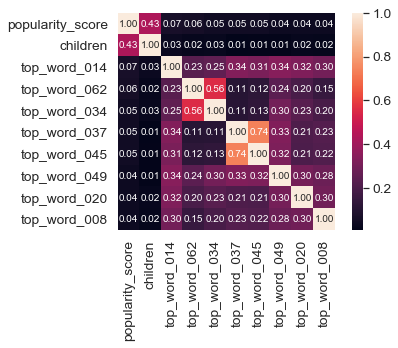

In [6]:
nb_top_corr = 10
cols = X_train.corr().nlargest(nb_top_corr, 'popularity_score')['popularity_score'].index
print(cols)
cm = np.corrcoef(X_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

### Train Linear Regression Model

In [8]:
model = utils.LinearRegressionModel()

In [9]:
X_train['bias'] = pd.Series(np.ones(X_train.shape[0]), index=X_train.index)
y_train = X_train['popularity_score']
X_train.drop(columns=['text', 'popularity_score'], inplace=True)
print(X_train)

      children  controversiality  is_root  top_word_001  top_word_002  \
0            0                 0        0             0             0   
1            0                 0        0             0             0   
2            0                 0        0             1             0   
3            0                 0        0             1             0   
4            0                 0        0             1             0   
5            0                 0        0             5             4   
6            0                 0        0             0             0   
7            1                 0        0             1             0   
8            1                 1        0             0             0   
9            1                 0        0             2             3   
10           0                 0        0             1             2   
11           0                 0        0             5             4   
12           0                 0        0          

In [10]:
model.fit(X_train.values, y_train.values, epsilon=0.0001)

### Make Predictions

In [11]:
X_validation['bias'] = pd.Series(np.ones(X_validation.shape[0]), index=X_validation.index)
y_validation = X_validation['popularity_score'].values
X_validation.drop(columns=['text', 'popularity_score'], inplace=True)

In [12]:
y_validation_preds = model.predict(X_validation)

In [13]:
MSE_validation = utils.mse(y_validation, y_validation_preds)
print(MSE_validation)

2.30426211039


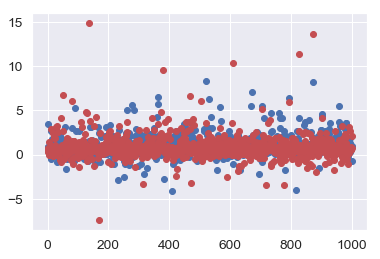

In [14]:
plt.plot(y_validation,"bo", y_validation_preds, 'ro')
plt.show()